# Mapeo estándar

El mapeo estándar es un mapeo hamiltonano de dos  dimensiones. Describe un sistema en el cual se tienen una barra rígida sujeta a un pivote, en este caso sin fricción. El extremo de la barra libre se somete a un impulso vertical hacia arriba de manera periódica. Se considera que el sistema esta en ausencia de la gravedad. Si la barra tiene una longitud $l$, momento de inercia $I$ y los impulsos son aplicados cada $t= 0,T,2T,...$ entonces las ecuaciones que describen este movimiento en términos de las variables  canónicas conjugadas que son $p,\theta$
$$H(p,\theta,t)= \frac{p^{2}}{2I}+ k \cos \theta \Sigma_{n} \delta(t-nT)  $$

donde $p$ representa el momento angular y $\theta$ representa la posición angular del rotor.Para este sistma las ecuaciones de movimiento resultan 
$$\frac{dp}{dt}= k sen\theta \Sigma _{n} \delta(t-nT)$$
$$ \frac{d\theta}{dt}= \frac{p}{I}$$


Aquí $\delta$ denota la función delta de Dirac. Para nuestros própositos examinaremos el valor de $p$ y $\theta$ justo antes de cada patada. Si se integran las ecuaciones de movimiento de $t = nT$ a un $t = (n+1)T$ obtendremos que :

$$p_{n+1}-p_{n}=k sen\theta_{n+1}$$
$$\theta_{n+1}-\theta_{n}= \frac{p_{n}T}{ I}$$

Si tomamos que $T/I=1$  obtenemos que 
$$\theta_{n+1}=(\theta_{n}+p_{n}) modulo2\pi  $$
$$p_{n+1}= p_n+ k sen\theta_{n +1}$$


Estas son as ecuaciones del mapeo estándar. El mapeo es uno de los ejemplos más fáciles para ejemplificar muchas de las características de los sistemas hamiltonianos.





Definimos la función del mapeo estándar además de dos funciones más que graficarán su espacio fase para un valor de $k$ fijo. 

In [7]:

using PyPlot

In [8]:
#definimos el mapeo estándar 
function EstandarMap(θ, p, k)
    θ_n = mod2pi(θ + p)
    p_n = mod2pi(p +k*sin(θ_n))
    return θ_n, p_n
end


EstandarMap (generic function with 1 method)

In [9]:
"""
iterarMap(f,θ_i,p_i,n,k)

Es una función que recibe la función del mapeo los valores iniciales de las variables y los itera para obtener los siguie-
tes valores. 
"""

function iterarMap(f,θ_i,p_i,n, k)   #Definimos una función para iterar el mapeo
    
    x = θ_i                      #    
                                     #Damos condiciones iniciales
    y = p_i                          #

    iteradosMX = [θ_i]

    iteradosMY = [p_i]               #Definimos dos listas que tendran los valores de cada par ordenado de theta y P, y agregamos las condiciones iniciales

    for i=0:n              #iniciamos un ciclo de iteraciones donde se calculan x_n, y_n y se agregan a lalista correspodiente            

        F = f(θ_i,p_i, k)
        
        push!(iteradosMX,F[1])
        
        push!(iteradosMY,F[2])
            

        θ_i = F[1]

        p_i = F[2]
    end

    return iteradosMX, iteradosMY  #La funcion iterados regresa las listas que corresponden a la trayectoria del 
end

iterarMap

In [10]:
function graficarMap(k)
    n = 100
    s=2pi/18

    for p_i=0:s:2pi
        for x_i =0:s:2pi
            t,p = iterarMap(EstandarMap,x_i,p_i,n, k)
            
            p = scatter(t,p,marker=".",s=0.1)
            title("Espacio fase, k=0.3")
        end
    end
    
end

graficarMap (generic function with 1 method)

Un análisis de los puntos fijos es necesario para saber más acerca de la dinámica del mapeo. 

Para analizar los puntos fijos del mapeo necesitamos encontrar aquellos puntos para los cuales  $p_{n+1}=p_n$ y $\theta_{n+1}=\theta_n$. De las ecuaciones para el mapeo tenemos que:
$$p_{n}=0$$
$$k sen \theta_{n+1}=0$$


Por tanto:
$$\theta_{n+1}=0, \pi$$


Lo que nos dice que los puntos fijos son de la forma:
$$x_{1}=(0,0), x_2=(0,\pi)$$

Sin  importar la constante del mapeo. 

En la siguiente gráfica se muestra el espacio fase y los dos puntos fijos obtenidos.

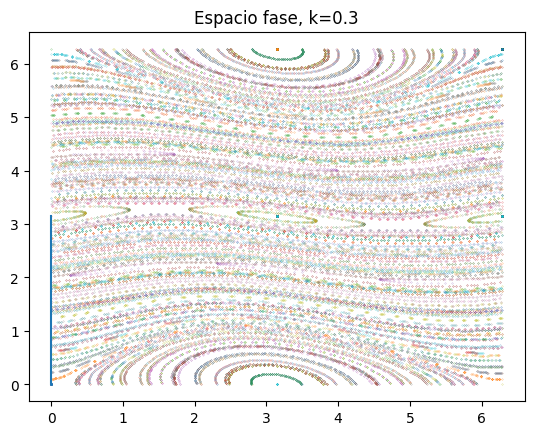

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8cf7a1b4d0>

In [11]:
graficarMap(0.3)
plot([0. ,0.],[0., pi])

Para analizar los puntos fijos del mapeo estándar que podemos escribir como:

$$
f_{\epsilon}(p,\theta)
= \begin{pmatrix}
\theta  + p \\\ 
p + k sen(\theta)
\end{pmatrix}$$

con $k>0$. 

Dado que los puntos fijos satisfacen la ecuación:
$f_{\epsilon}(x)=x $ para cierta $x$ en $\mathbb{T^{2}}$ modulo $2\pi$. Lo que siginifica que :

$$
\begin{pmatrix}
\theta  + p \\\ 
p + k sen(\theta)
\end{pmatrix}=
\begin{pmatrix}
\theta\\\
p
\end{pmatrix}$$



Entonces los puntos fijos resultan :
$$x_{1} = (0,0) $$
$$x_{2} = (0,\pi) $$

Para estos dos puntos necesitamos saber de qué tipo son, para ello analizaremos la parte lineal del mapeo. Tomando la diferencial del mismo y evaluando en cada punto fijo obtendremos los valores y vectores propios de los cual obtendremos su naturaleza. 

$$D f_{k}(p,\theta)=  \left( \begin{array}{cc}
1 & 1 \\
1 & k cos(\theta)  \end{array} \right) $$

Evalando en $x_{1}, x_{2}$

$$D f_{k}(0,0)=  \left( \begin{array}{cc}
1 & 1 \\
1 & k   \end{array} \right) $$

A la matriz anterior le calculamos los puntos fijos usando que:
$$D f_{x_{1}}=\lambda x_{1}$$
Lo cual nos lleva a 
$$D f_{k}(0,0)=  \left( \begin{array}{cc}
1-\lambda & 1 \\
1 & k -\lambda \end{array} \right) = 0$$
Implica que $$(1-\lambda)(k-\lambda)-1=0$$
entonces las soluciones al polinomio característico que son los valores propios son:
$$\lambda= \frac{k+1}{2}\pm \frac{1}{2}\sqrt(k^{2}-2k +5)$$
Para cualquier K mayor a cero tenemos que el eigenvalor es tá fuera del círculo unitario por lo que ambos valores propios son hiperbólicos. Uno de ellos correspondiente a la variedad estable (el más pequeño), y el otro la variedad inestable (el mayor). Sólo queremos concentrarnos en este punto fijo. En este punto aplicaremos el método de parametrización de manera computacional.

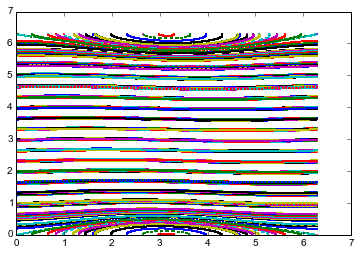

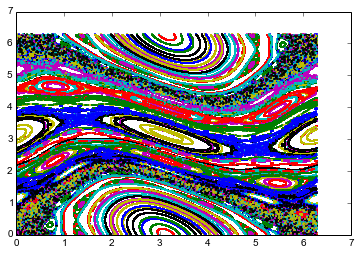

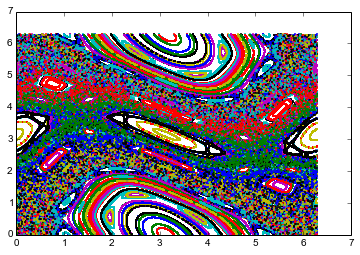

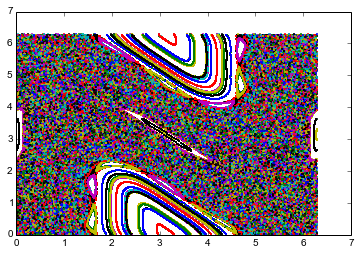

In [13]:
K = [0.06, 0.971635, 1.2, 2]
n = 1000

plt.figure()
for k in K:
    for theta_i in numpy.linspace(0,2*math.pi, 20):
     for p_i in numpy.linspace(0,2*math.pi,20):
            t,p = iterarMap(MapEstandar,theta_i,p_i,n, k)
            plt.plot (t,p,'.', markersize=3)
    plt.show()

El artículo de J.D. Mirees desarrolla el método de parametrización en el caso del mapeo estándar de manera explícita, encontrando las relaciones derecurrencia de las que se obtienen los valores de los coeficientes  de cada unos de los polinomios. El método de parametrización tiene la finalidad de estudiar las variedades inestables y estables de un sistema simpléctico 